In [1]:
pip install missingno

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [30]:
# Import required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
from scipy.stats import zscore, probplot

# Enable inline plotting for Jupyter Notebook
%matplotlib inline


In [31]:
df = pd.read_csv('retail_store_inventory.csv')
print(df.shape)
df.head()

(73100, 15)


,Date,Store ID,Product ID,Category,Region,Inventory Level,Units Sold,Units Ordered,Demand Forecast,Price,Discount,Weather Condition,Holiday/Promotion,Competitor Pricing,Seasonality
0,2022-01-01,S001,P0001,Groceries,North,231,127,55,135.47,33.50,20,Rainy,0,29.69,Autumn
1,2022-01-01,S001,P0002,Toys,South,204,150,66,144.04,63.01,20,Sunny,0,66.16,Autumn
2,2022-01-01,S001,P0003,Toys,West,102,65,51,74.02,27.99,10,Sunny,1,31.32,Summer
3,2022-01-01,S001,P0004,Toys,North,469,61,164,62.18,32.72,10,Cloudy,1,34.74,Autumn
4,2022-01-01,S001,P0005,Electronics,East,166,14,135,9.26,73.64,0,Sunny,0,68.95,Summer


Basic Info and Summary

In [32]:
# Display basic dataset information
print("Basic Info:")
print(df.info())

# Summary statistics for numerical columns
print("\nSummary Statistics:")
display(df.describe())


Basic Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73100 entries, 0 to 73099
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                73100 non-null  object 
 1   Store ID            73100 non-null  object 
 2   Product ID          73100 non-null  object 
 3   Category            73100 non-null  object 
 4   Region              73100 non-null  object 
 5   Inventory Level     73100 non-null  int64  
 6   Units Sold          73100 non-null  int64  
 7   Units Ordered       73100 non-null  int64  
 8   Demand Forecast     73100 non-null  float64
 9   Price               73100 non-null  float64
 10  Discount            73100 non-null  int64  
 11  Weather Condition   73100 non-null  object 
 12  Holiday/Promotion   73100 non-null  int64  
 13  Competitor Pricing  73100 non-null  float64
 14  Seasonality         73100 non-null  object 
dtypes: float64(3), int64(5), object(7)
memory

,Inventory Level,Units Sold,Units Ordered,Demand Forecast,Price,Discount,Holiday/Promotion,Competitor Pricing
count,73100.000000,73100.000000,73100.000000,73100.000000,73100.000000,73100.000000,73100.000000,73100.000000
mean,274.469877,136.464870,110.004473,141.494720,55.135108,10.009508,0.497305,55.146077
std,129.949514,108.919406,52.277448,109.254076,26.021945,7.083746,0.499996,26.191408
min,50.000000,0.000000,20.000000,-9.990000,10.000000,0.000000,0.000000,5.030000
25%,162.000000,49.000000,65.000000,53.670000,32.650000,5.000000,0.000000,32.680000
50%,273.000000,107.000000,110.000000,113.015000,55.050000,10.000000,0.000000,55.010000
75%,387.000000,203.000000,155.000000,208.052500,77.860000,15.000000,1.000000,77.820000
max,500.000000,499.000000,200.000000,518.550000,100.000000,20.000000,1.000000,104.940000


Checking and Visualizing the Missing Values

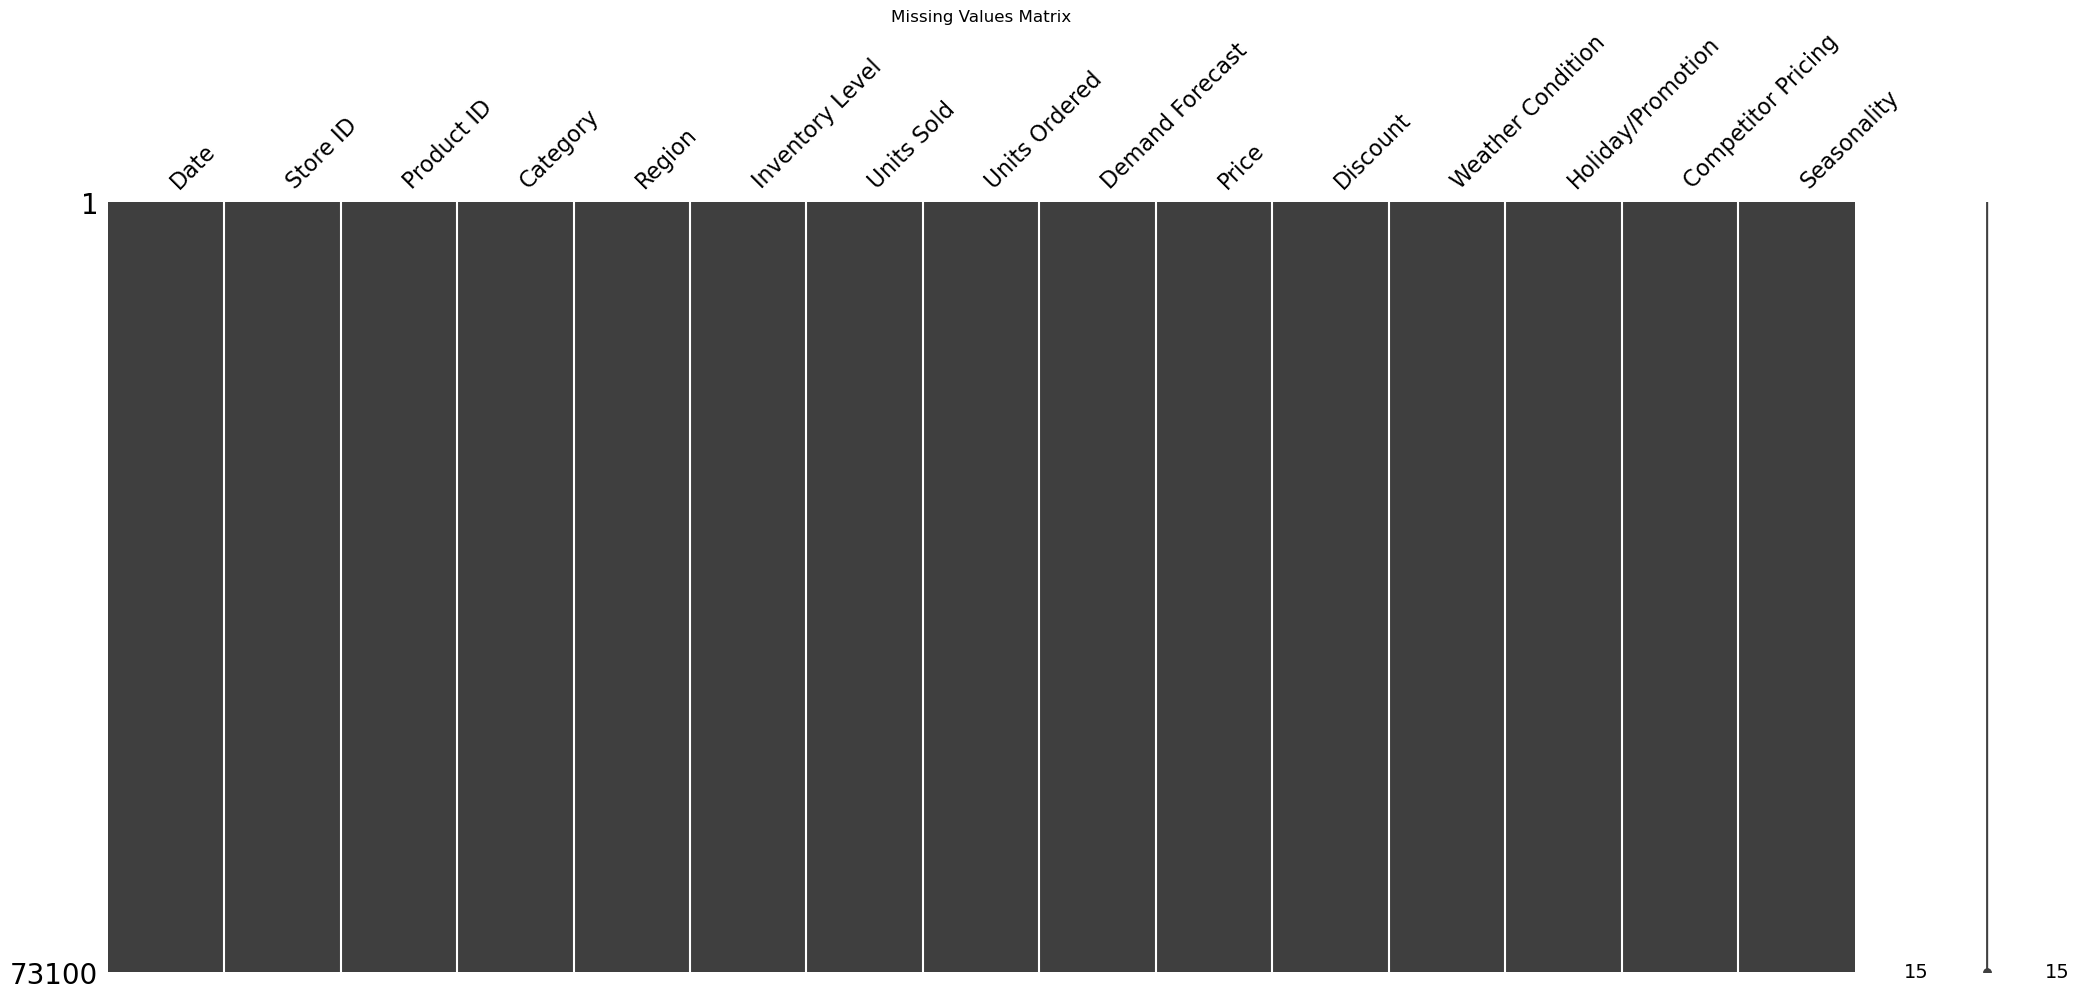


Missing Value Statistics:


,Missing Values,Percentage


In [33]:
# Visualizing missing values using missingno
msno.matrix(df)
plt.title("Missing Values Matrix")
plt.show()

# Checking missing value statistics
missing_values = df.isnull().sum()
missing_percent = (missing_values / len(df)) * 100
missing_data = pd.DataFrame({"Missing Values": missing_values, "Percentage": missing_percent})

# Display only columns with missing values
print("\nMissing Value Statistics:")
display(missing_data[missing_data["Missing Values"] > 0])


In [34]:
# Count missing values per column
missing_values = df.isnull().sum()

# Print only columns with missing values
print("Missing Values Count:")
print(missing_values[missing_values > 0])


Missing Values Count:
Series([], dtype: int64)


In [35]:
df.duplicated().sum()

0

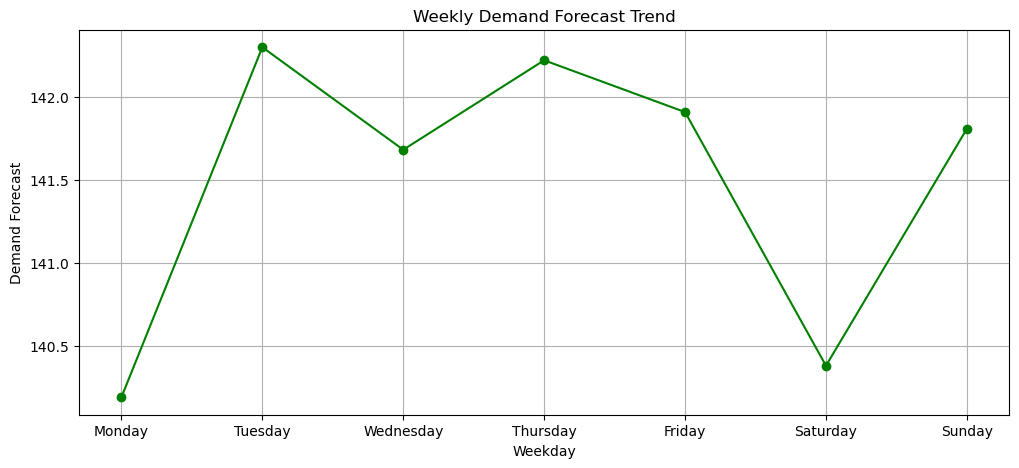

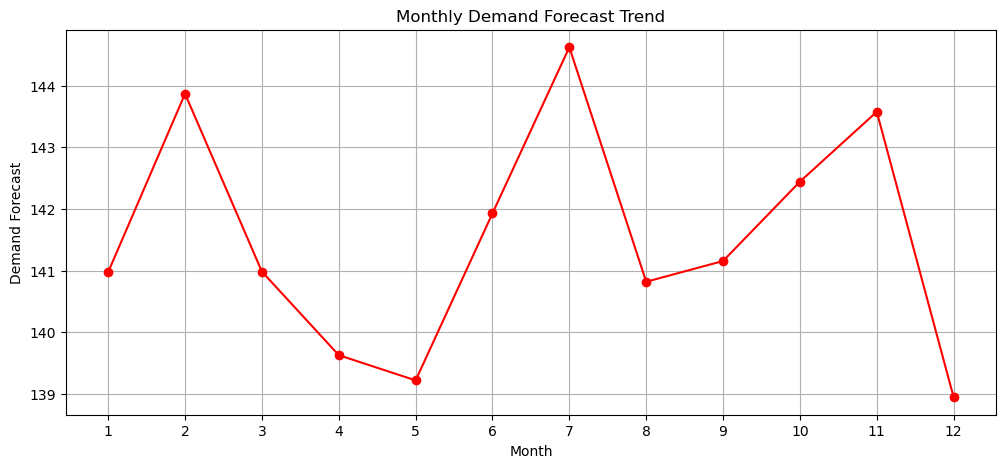

In [36]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset (assuming df is already loaded)
df['Date'] = pd.to_datetime(df['Date'])  # Convert to datetime
df['Weekday'] = df['Date'].dt.day_name()  # Extract Weekday name
df['Month'] = df['Date'].dt.month  # Extract Month

# Define the correct order of weekdays
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Group by Weekday and take mean demand forecast
weekday_trend = df.groupby('Weekday')['Demand Forecast'].mean().reindex(weekday_order)

# Group by Month and take mean demand forecast
monthly_trend = df.groupby('Month')['Demand Forecast'].mean()

# Line Plot: Demand Forecast vs Weekday
plt.figure(figsize=(12, 5))
plt.plot(weekday_trend.index, weekday_trend.values, marker='o', linestyle='-', color='green')
plt.xlabel('Weekday')
plt.ylabel('Demand Forecast')
plt.title('Weekly Demand Forecast Trend')
plt.grid(True)
plt.show()

# Line Plot: Demand Forecast vs Month
plt.figure(figsize=(12, 5))
plt.plot(monthly_trend.index, monthly_trend.values, marker='o', linestyle='-', color='red')
plt.xlabel('Month')
plt.ylabel('Demand Forecast')
plt.title('Monthly Demand Forecast Trend')
plt.xticks(range(1, 13))  # Set x-axis from 1 to 12 (months)
plt.grid(True)
plt.show()


In [17]:
df.head()

,Date,Store ID,Product ID,Category,Region,Inventory Level,Units Sold,Units Ordered,Demand Forecast,Price,Discount,Weather Condition,Holiday/Promotion,Competitor Pricing,Seasonality,Weekday,Month
0,2022-01-01,S001,P0001,Groceries,North,231,127,55,135.47,33.50,20,Rainy,0,29.69,Autumn,Saturday,1
1,2022-01-01,S001,P0002,Toys,South,204,150,66,144.04,63.01,20,Sunny,0,66.16,Autumn,Saturday,1
2,2022-01-01,S001,P0003,Toys,West,102,65,51,74.02,27.99,10,Sunny,1,31.32,Summer,Saturday,1
3,2022-01-01,S001,P0004,Toys,North,469,61,164,62.18,32.72,10,Cloudy,1,34.74,Autumn,Saturday,1
4,2022-01-01,S001,P0005,Electronics,East,166,14,135,9.26,73.64,0,Sunny,0,68.95,Summer,Saturday,1


In [37]:
import pandas as pd
import matplotlib.pyplot as plt

# Remove invalid Demand Forecast values
df = df[df['Demand Forecast'] > 0]

# Detect & Remove Outliers using IQR (Best for Right-Skewed Data)
Q1 = df['Demand Forecast'].quantile(0.25)
Q3 = df['Demand Forecast'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove extreme outliers
df = df[(df['Demand Forecast'] >= lower_bound) & (df['Demand Forecast'] <= upper_bound)]



In [38]:
print(df['Demand Forecast'].max())
print(df['Demand Forecast'].min())

440.46
0.01


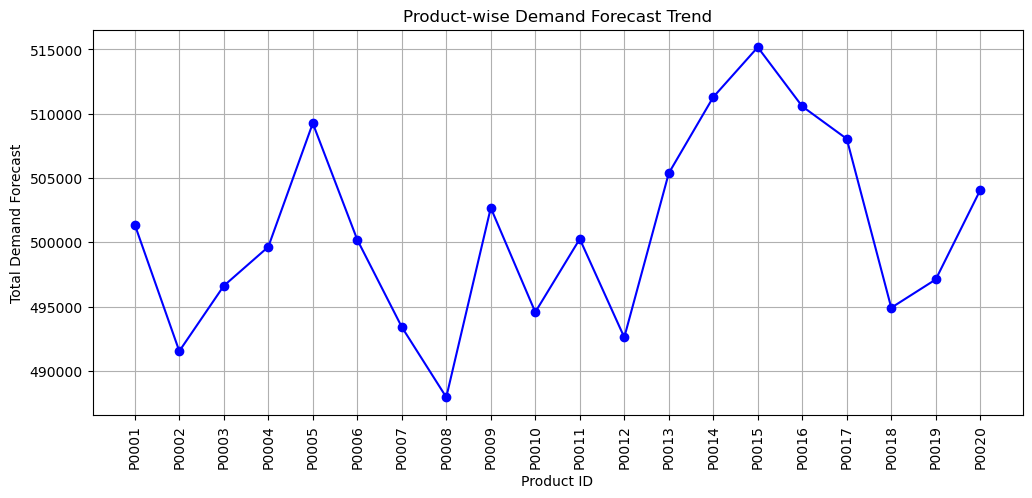

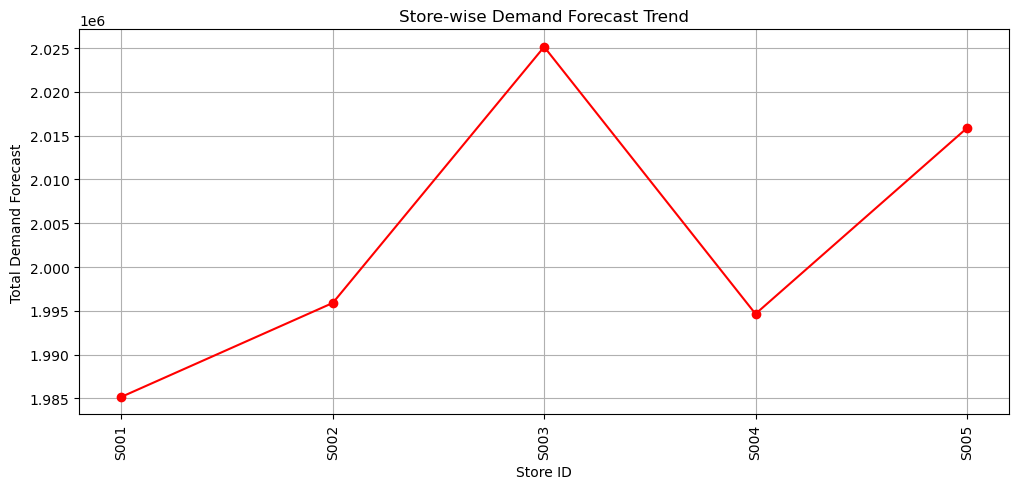

In [39]:
# Aggregate Demand Forecast by Product ID
product_trend = df.groupby('Product ID')['Demand Forecast'].sum()

# Aggregate Demand Forecast by Store ID
store_trend = df.groupby('Store ID')['Demand Forecast'].sum()

# Plot: Product-wise Demand Forecast
plt.figure(figsize=(12, 5))
plt.plot(product_trend.index, product_trend.values, marker='o', linestyle='-', color='blue')
plt.xlabel('Product ID')
plt.ylabel('Total Demand Forecast')
plt.title('Product-wise Demand Forecast Trend')
plt.xticks(rotation=90)  # Rotate for readability
plt.grid(True)
plt.show()

# Plot: Store-wise Demand Forecast
plt.figure(figsize=(12, 5))
plt.plot(store_trend.index, store_trend.values, marker='o', linestyle='-', color='red')
plt.xlabel('Store ID')
plt.ylabel('Total Demand Forecast')
plt.title('Store-wise Demand Forecast Trend')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()


In [18]:
import pandas as pd

# Check unique values in categorical columns
categorical_cols = ['Weather Condition', 'Seasonality', 'Region', 'Category', 'Weekday']
for col in categorical_cols:
    print(f"Unique values in {col}:", df[col].unique())


Unique values in Weather Condition: ['Rainy' 'Sunny' 'Cloudy' 'Snowy']
Unique values in Seasonality: ['Autumn' 'Summer' 'Winter' 'Spring']
Unique values in Region: ['North' 'South' 'West' 'East']
Unique values in Category: ['Groceries' 'Toys' 'Electronics' 'Furniture' 'Clothing']
Unique values in Weekday: ['Saturday' 'Sunday' 'Monday' 'Tuesday' 'Wednesday' 'Thursday' 'Friday']


# CREATING NEW COLUMNS

In [41]:
import pandas as pd

# Sales Velocity (How fast items are selling)
df['Sales Velocity'] = df['Units Sold'] / (df['Inventory Level'] + 1)  # Avoid division by zero

# Effective Price (Price after applying discount)
df['Effective Price'] = df['Price'] * (1 - df['Discount'] / 100)

# Competitive Price Gap (Price difference with competitors)
df['Competitive Price Gap'] = df['Competitor Pricing'] - df['Effective Price']

# Display first 5 rows to verify new columns
print(df[['Sales Velocity', 'Effective Price', 'Competitive Price Gap']].head())


   Sales Velocity  Effective Price  Competitive Price Gap
0        0.547414           26.800                  2.890
1        0.731707           50.408                 15.752
2        0.631068           25.191                  6.129
3        0.129787           29.448                  5.292
4        0.083832           73.640                 -4.690


In [42]:
df.head()

,Date,Store ID,Product ID,Category,Region,Inventory Level,Units Sold,Units Ordered,Demand Forecast,Price,Discount,Weather Condition,Holiday/Promotion,Competitor Pricing,Seasonality,Weekday,Month,Sales Velocity,Effective Price,Competitive Price Gap
0,2022-01-01,S001,P0001,Groceries,North,231,127,55,135.47,33.50,20,Rainy,0,29.69,Autumn,Saturday,1,0.547414,26.800,2.890
1,2022-01-01,S001,P0002,Toys,South,204,150,66,144.04,63.01,20,Sunny,0,66.16,Autumn,Saturday,1,0.731707,50.408,15.752
2,2022-01-01,S001,P0003,Toys,West,102,65,51,74.02,27.99,10,Sunny,1,31.32,Summer,Saturday,1,0.631068,25.191,6.129
3,2022-01-01,S001,P0004,Toys,North,469,61,164,62.18,32.72,10,Cloudy,1,34.74,Autumn,Saturday,1,0.129787,29.448,5.292
4,2022-01-01,S001,P0005,Electronics,East,166,14,135,9.26,73.64,0,Sunny,0,68.95,Summer,Saturday,1,0.083832,73.640,-4.690


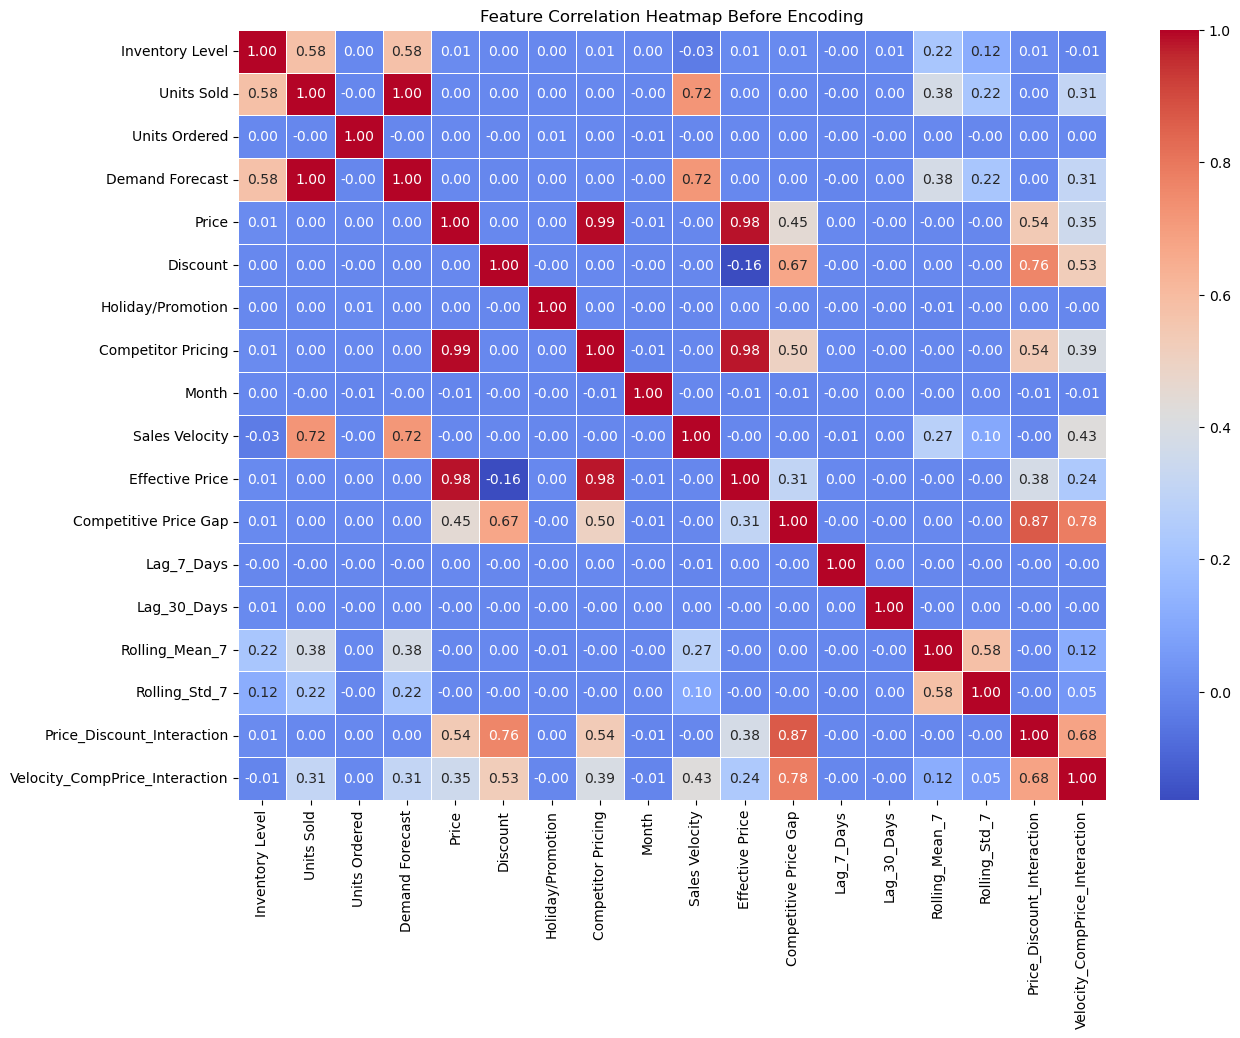

In [44]:
# 1️⃣ Lag Features
df['Lag_7_Days'] = df['Demand Forecast'].shift(7)
df['Lag_30_Days'] = df['Demand Forecast'].shift(30)

# 2️⃣ Rolling Statistics
df['Rolling_Mean_7'] = df['Demand Forecast'].rolling(window=7).mean()
df['Rolling_Std_7'] = df['Demand Forecast'].rolling(window=7).std()

# 3️⃣ Interaction Terms
df['Price_Discount_Interaction'] = df['Effective Price'] * df['Discount']
df['Velocity_CompPrice_Interaction'] = df['Sales Velocity'] * df['Competitive Price Gap']

# 4️⃣ Handle missing values (introduced by shift/rolling operations)
df.fillna(0, inplace=True)

# ------------------------------ STEP 2: CORRELATION HEATMAP ------------------------------

# Compute correlation matrix (Only numeric columns, before encoding)
corr_matrix = df.select_dtypes(include=['number']).corr()

# Plot heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Feature Correlation Heatmap Before Encoding')
plt.show()

DATA AFTER APPLYING LABEL AND ONE HOT ENCODING

STANDARDIZING NUMERICAL FEATURES

In [46]:
df.head()

,Date,Store ID,Product ID,Category,Region,Inventory Level,Units Sold,Units Ordered,Demand Forecast,Price,...,Month,Sales Velocity,Effective Price,Competitive Price Gap,Lag_7_Days,Lag_30_Days,Rolling_Mean_7,Rolling_Std_7,Price_Discount_Interaction,Velocity_CompPrice_Interaction
0,2022-01-01,S001,P0001,Groceries,North,231,127,55,135.47,33.50,...,1,0.547414,26.800,2.890,0.0,0.0,0.0,0.0,536.00,1.582026
1,2022-01-01,S001,P0002,Toys,South,204,150,66,144.04,63.01,...,1,0.731707,50.408,15.752,0.0,0.0,0.0,0.0,1008.16,11.525854
2,2022-01-01,S001,P0003,Toys,West,102,65,51,74.02,27.99,...,1,0.631068,25.191,6.129,0.0,0.0,0.0,0.0,251.91,3.867816
3,2022-01-01,S001,P0004,Toys,North,469,61,164,62.18,32.72,...,1,0.129787,29.448,5.292,0.0,0.0,0.0,0.0,294.48,0.686834
4,2022-01-01,S001,P0005,Electronics,East,166,14,135,9.26,73.64,...,1,0.083832,73.640,-4.690,0.0,0.0,0.0,0.0,0.00,-0.393174


In [47]:
# Drop Date column (since time-based features are already created)
df.drop(columns=['Date'], inplace=True)

# Separate features and target variable
X = df.drop(columns=['Demand Forecast'])  # Independent variables
y = df['Demand Forecast']  # Target variable

In [48]:
# Identify categorical & numerical columns
categorical_cols = X.select_dtypes(include=['object']).columns
numerical_cols = X.select_dtypes(include=['number']).columns
print(categorical_cols)
print(numerical_cols)

Index(['Store ID', 'Product ID', 'Category', 'Region', 'Weather Condition',
       'Seasonality', 'Weekday'],
      dtype='object')
Index(['Inventory Level', 'Units Sold', 'Units Ordered', 'Price', 'Discount',
       'Holiday/Promotion', 'Competitor Pricing', 'Month', 'Sales Velocity',
       'Effective Price', 'Competitive Price Gap', 'Lag_7_Days', 'Lag_30_Days',
       'Rolling_Mean_7', 'Rolling_Std_7', 'Price_Discount_Interaction',
       'Velocity_CompPrice_Interaction'],
      dtype='object')


In [49]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Define preprocessing: Standardize numerical and encode categorical features
preprocessor = ColumnTransformer([
    ("num_scaler", StandardScaler(), numerical_cols),
    ("cat_encoder", OneHotEncoder(handle_unknown="ignore"), categorical_cols)
])


In [50]:
from sklearn.model_selection import train_test_split

# Split data into 70% training, 15% validation, 15% test
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


In [51]:
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Function to train and evaluate models
def train_and_evaluate(model, model_name):
    pipeline = Pipeline([
        ("preprocessor", preprocessor),
        ("model", model)
    ])
    
    # Train model
    pipeline.fit(X_train, y_train)
    
    # Predictions
    y_pred = pipeline.predict(X_valid)
    
    # Evaluation metrics
    mae = mean_absolute_error(y_valid, y_pred)
    mse = mean_squared_error(y_valid, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_valid, y_pred)
    
    print(f"\n📌 {model_name} Performance:")
    print(f"MAE: {mae:.2f}")
    print(f"RMSE: {rmse:.2f}")
    print(f"R² Score: {r2:.2f}")
    
    return pipeline


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

# Train models
lr_model = train_and_evaluate(LinearRegression(), "Multiple Linear Regression")
svr_model = train_and_evaluate(SVR(kernel='rbf'), "Support Vector Regressor")
rf_model = train_and_evaluate(RandomForestRegressor(n_estimators=100, random_state=42), "Random Forest Regressor")
dt_model = train_and_evaluate(DecisionTreeRegressor(random_state=42), "Decision Tree Regressor")



📌 Multiple Linear Regression Performance:
MAE: 7.40
RMSE: 8.58
R² Score: 0.99

📌 Support Vector Regressor Performance:
MAE: 11.44
RMSE: 15.87
R² Score: 0.98


In [ ]:
# Function to evaluate on test set
def final_evaluation(model, model_name):
    y_pred_test = model.predict(X_test)
    
    # Metrics on test set
    mae_test = mean_absolute_error(y_test, y_pred_test)
    mse_test = mean_squared_error(y_test, y_pred_test)
    rmse_test = np.sqrt(mse_test)
    r2_test = r2_score(y_test, y_pred_test)
    
    print(f"\n📌 FINAL TEST SET PERFORMANCE - {model_name}:")
    print(f"MAE: {mae_test:.2f}")
    print(f"RMSE: {rmse_test:.2f}")
    print(f"R² Score: {r2_test:.2f}")

# Evaluate on test set
final_evaluation(lr_model, "Multiple Linear Regression")
final_evaluation(svr_model, "Support Vector Regressor")
final_evaluation(rf_model, "Random Forest Regressor")
final_evaluation(dt_model, "Decision Tree Regressor")
